In [1]:
import sqlite3

In [2]:
conn = sqlite3.connect('emaildb.sqlite')
cur = conn.cursor()


In [3]:
cur.execute('DROP TABLE IF EXISTS Counts')

In [4]:
cur.execute('CREATE TABLE Counts(org TEXT, count INTEGER)')

In [8]:
fname = 'mbox.txt'
fh = open(fname)
for line in fh:
    if not line.startswith('From: '):
        continue
    pieces = line.split()
    email = pieces[1]
    org = email.split('@')[1]
    cur.execute('SELECT count FROM Counts WHERE org = ? ', (org,))
    row = cur.fetchone()
    if row is None:
        cur.execute('''INSERT INTO Counts (org, count)
                    VALUES (?, 1)''', (org,))
    else:
        cur.execute('UPDATE Counts SET count = count + 1 WHERE org = ?',
                    (org,))
conn.commit()

sqlstr = 'SELECT org, count FROM Counts ORDER BY count DESC LIMIT 10'

for row in cur.execute(sqlstr):
    print(str(row[0]), row[1])

cur.close()

iupui.edu 536
umich.edu 491
indiana.edu 178
caret.cam.ac.uk 157
vt.edu 110
uct.ac.za 96
media.berkeley.edu 56
ufp.pt 28
gmail.com 25
et.gatech.edu 17


# Database Grading

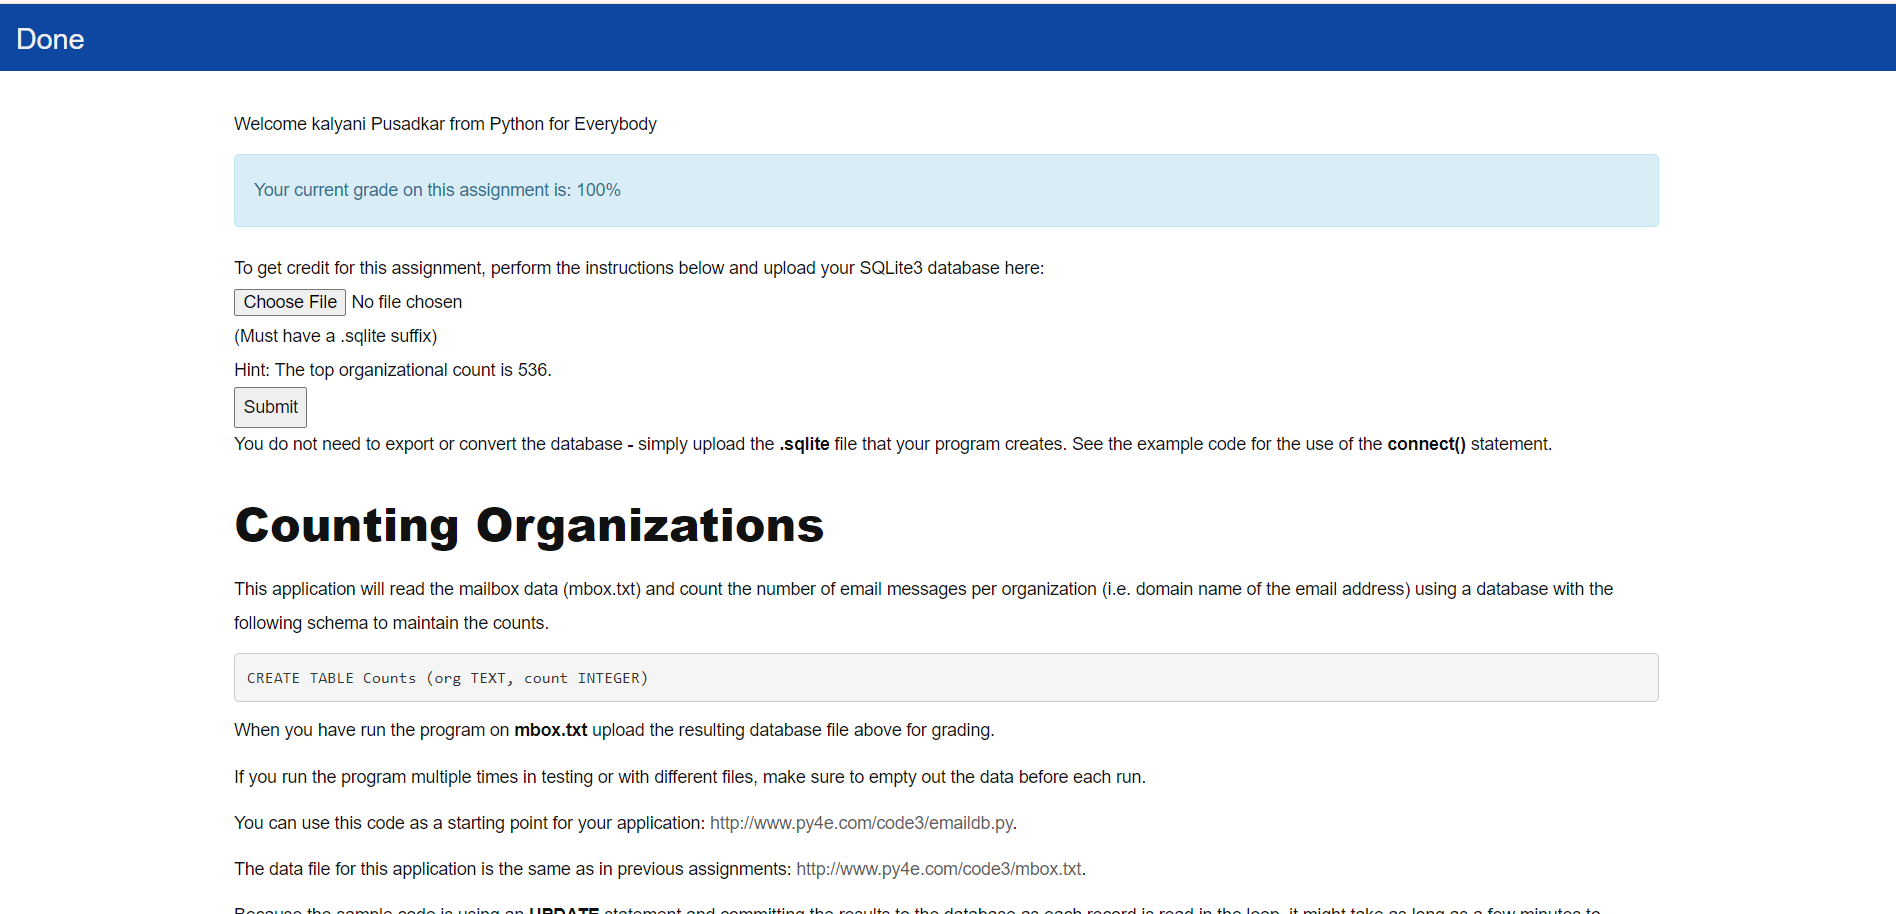